In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [497]:
df = pd.read_excel(r'C:\Users\admin\Debourgh-Sales.xlsx',sheet_name='Sheet2')

In [498]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


## Line Plot

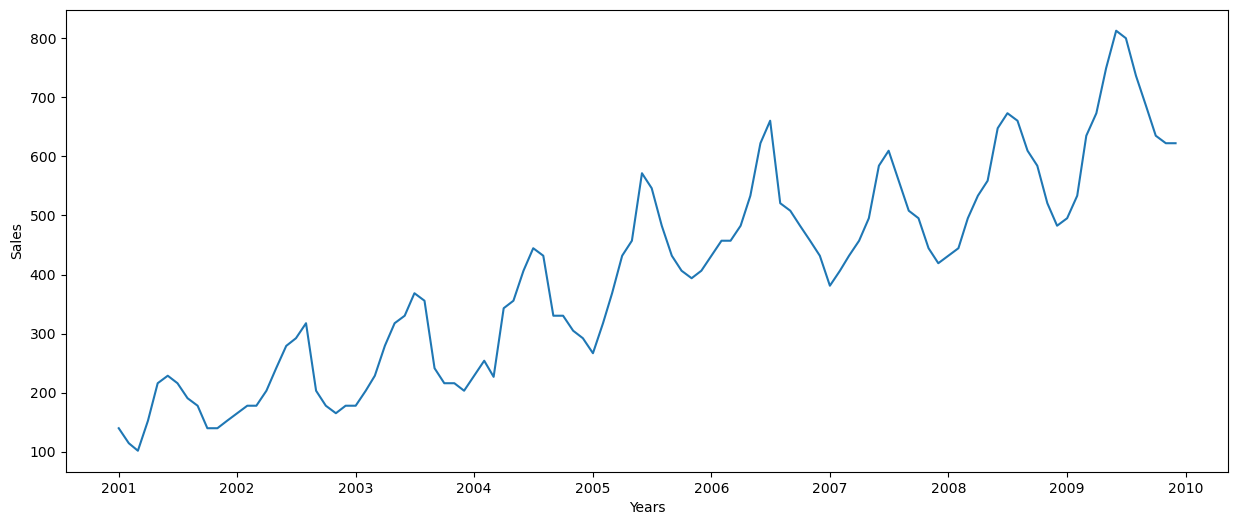

In [500]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df)
plt.show()

In [501]:
df['year']=df['Years'].dt.year
df.head()

,Years,Sales,year
0,2001-01-01,139.7,2001
1,2001-02-01,114.3,2001
2,2001-03-01,101.6,2001
3,2001-04-01,152.4,2001
4,2001-05-01,215.9,2001


In [502]:
df['quater'] = df['Years'].dt.quarter

In [503]:
df.head()

,Years,Sales,year,quater
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


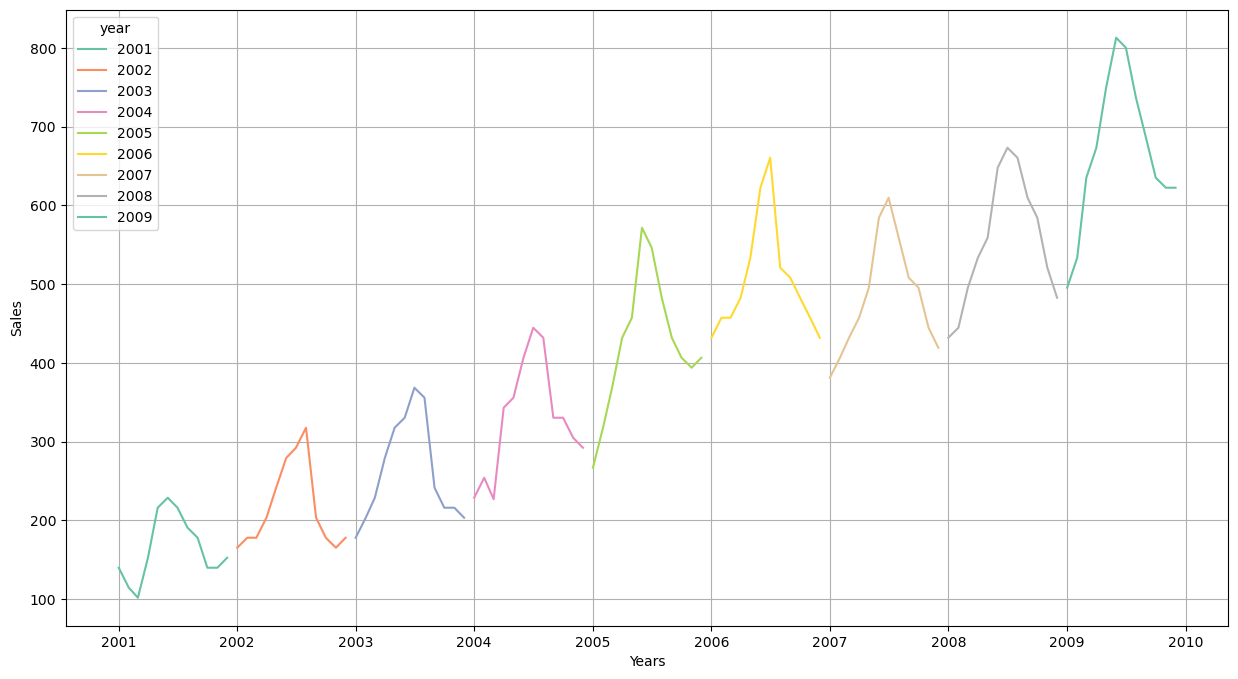

In [504]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Years',y='Sales',data=df,hue='year',palette='Set2')
plt.grid()
plt.show()

In [505]:
df.head()

,Years,Sales,year,quater
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


In [506]:
sales_by_year = df[['Sales','year']].groupby(by='year').sum().reset_index()

In [507]:
sales_by_year.head()

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0


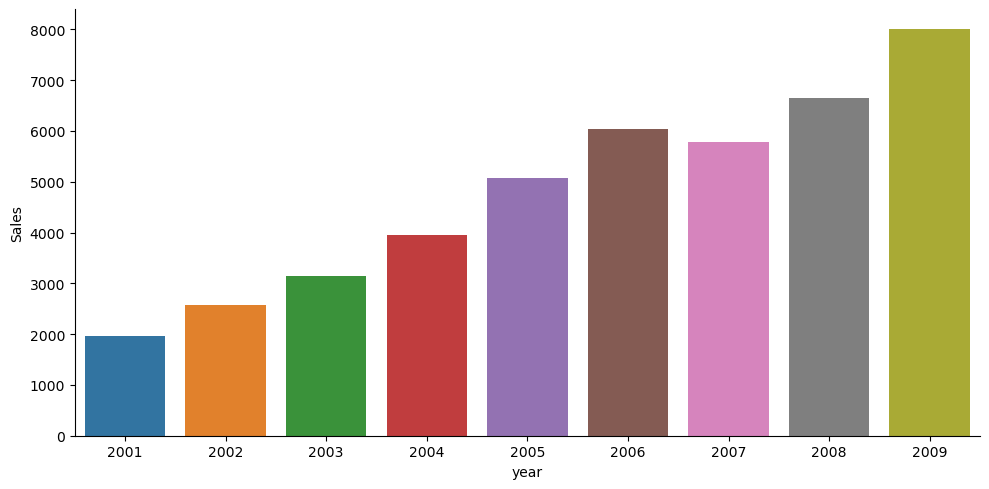

In [508]:
sns.catplot(x='year',y='Sales',data=sales_by_year,kind='bar',aspect=2)

In [509]:
sales = df[['Sales','year','quater']].groupby(by=['year','quater']).sum().values

In [510]:
sales.shape

(36, 1)

In [511]:
df_sales = pd.DataFrame(sales.reshape(9,4),index=list(range(2001,2010)),columns=['Q1','Q2','Q3','Q4'])

In [512]:
df_sales.head()

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5


## barplot & stacked bar plot

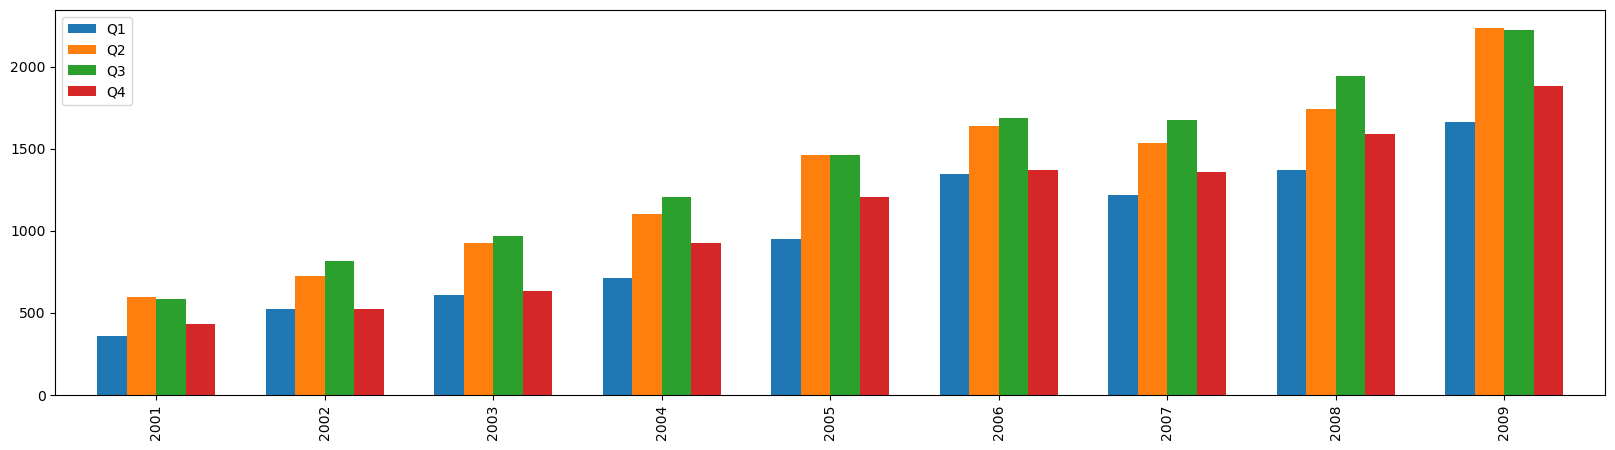

In [513]:
fig,ax = plt.subplots(figsize=(20,5))
df_sales.plot(kind='bar',ax=ax,width=0.7)
plt.show()

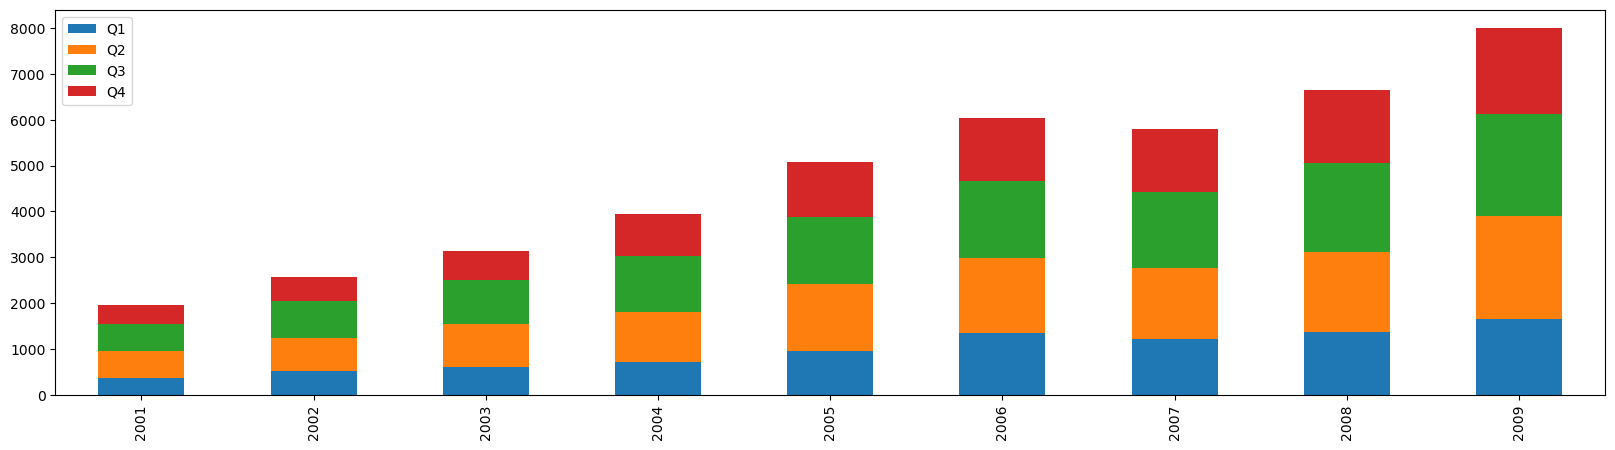

In [514]:
fig,ax = plt.subplots(figsize=(20,5))
df_sales.plot(kind='bar',ax=ax,stacked=True)
plt.show()

In [515]:
df_sales.head()

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5


## heatmap

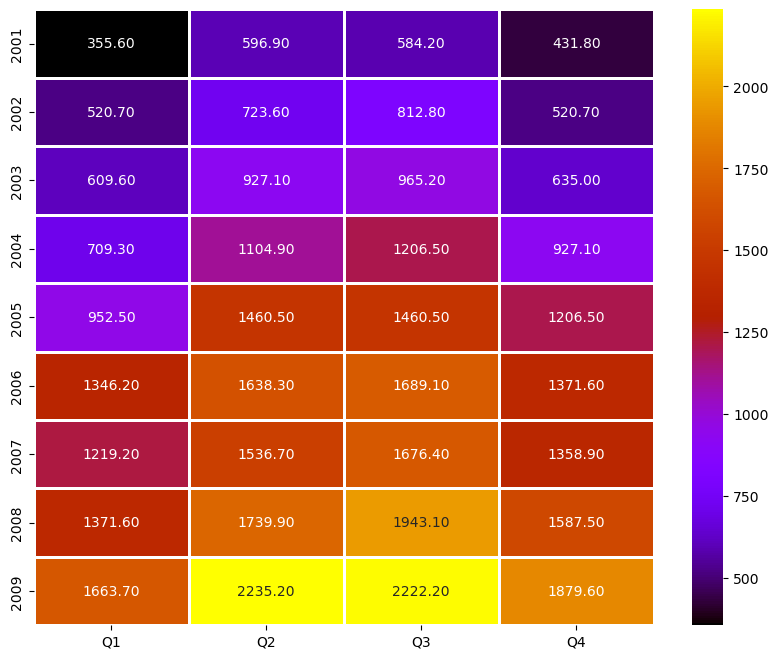

In [516]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sales,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.show()

## Area Plot

In [517]:
df1 = df.set_index('Years')

In [518]:
df1.drop(['year','quater'],axis=1,inplace=True)

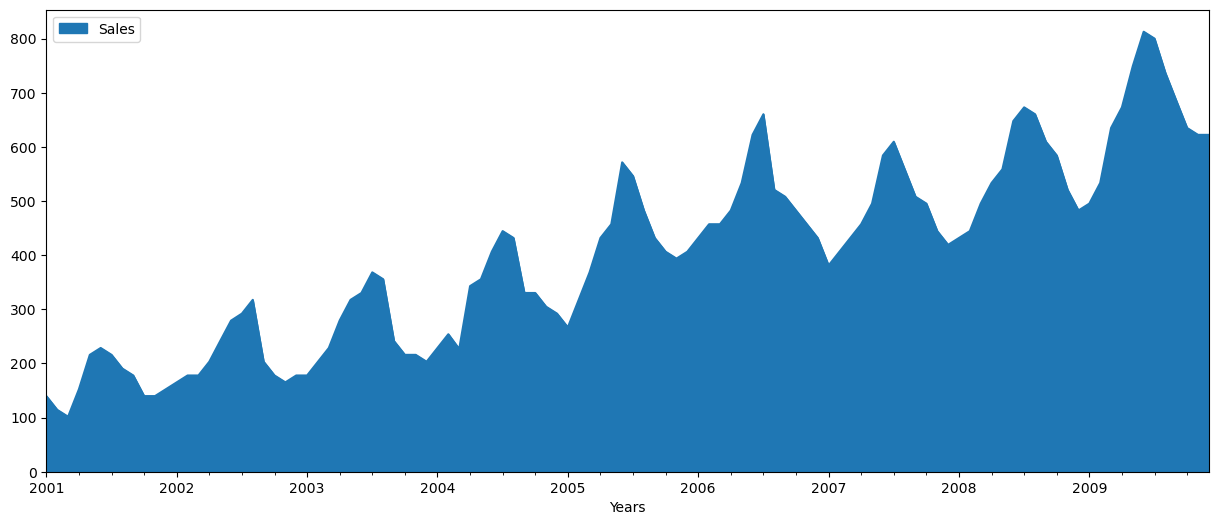

In [519]:
fig,ax = plt.subplots(figsize=(15,6))
df1.plot(kind='area',ax=ax)
plt.show()

## Linear Regression with Time Series Data

In [520]:
data =pd.read_excel('Debourgh-Sales.xlsx',sheet_name='Sheet3')

In [521]:
data.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   72 non-null     datetime64[ns]
 1   Sales   72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [523]:
data['Years'] = pd.to_datetime(data['Years'])


In [524]:
data.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   72 non-null     datetime64[ns]
 1   Sales   72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [526]:
data['td'] = np.arange(1,73,1)

In [527]:
data.head()

,Years,Sales,td
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [528]:
data['month_name'] = data['Years'].dt.month_name()

In [529]:
data.head()

,Years,Sales,td,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [530]:
data['Years'].dt.year.value_counts()

2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
Name: Years, dtype: int64

In [531]:
## independent variable ==> date/time
# dependent variable : Sales.


train =  data.head(48)   #first 4 years

test = data.loc[48:]    #rest 2 years

In [532]:
train.head()

,Years,Sales,td,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [533]:
test.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [534]:
xtrain = train[['td']].values

In [535]:
xtrain.shape

(48, 1)

In [536]:
ytrain = train['Sales'].values

In [537]:
ytrain

array([139.7, 114.3, 101.6, 152.4, 215.9, 228.6, 215.9, 190.5, 177.8,
       139.7, 139.7, 152.4, 165.1, 177.8, 177.8, 203.2, 241.3, 279.1,
       292.1, 317.5, 203.2, 177.8, 165.1, 177.8, 177.8, 203.2, 228.6,
       279.4, 317.5, 330.2, 368.3, 355.6, 241.3, 215.9, 215.9, 203.2,
       228.6, 254. , 226.7, 342.9, 355.6, 406.4, 444.5, 431.8, 330.2,
       330.2, 304.8, 292.1])

In [538]:
from sklearn.linear_model import LinearRegression

In [539]:
model_trend = LinearRegression()

In [540]:
model_trend.fit(xtrain,ytrain)

LinearRegression()

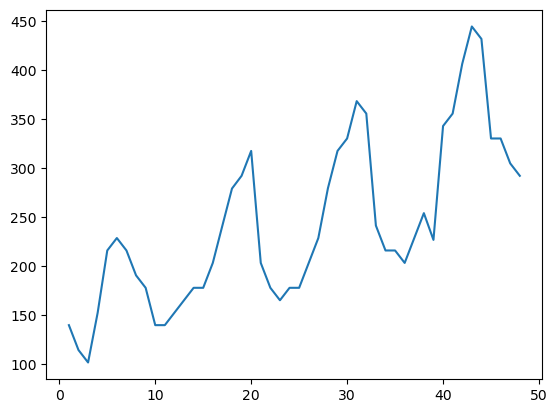

In [541]:
plt.plot(xtrain,ytrain)

In [542]:
yfit = model_trend.predict(xtrain)

In [543]:
yfit

array([138.67193878, 143.08217542, 147.49241207, 151.90264872,
       156.31288537, 160.72312201, 165.13335866, 169.54359531,
       173.95383196, 178.36406861, 182.77430525, 187.1845419 ,
       191.59477855, 196.0050152 , 200.41525185, 204.82548849,
       209.23572514, 213.64596179, 218.05619844, 222.46643508,
       226.87667173, 231.28690838, 235.69714503, 240.10738168,
       244.51761832, 248.92785497, 253.33809162, 257.74832827,
       262.15856492, 266.56880156, 270.97903821, 275.38927486,
       279.79951151, 284.20974815, 288.6199848 , 293.03022145,
       297.4404581 , 301.85069475, 306.26093139, 310.67116804,
       315.08140469, 319.49164134, 323.90187799, 328.31211463,
       332.72235128, 337.13258793, 341.54282458, 345.95306122])

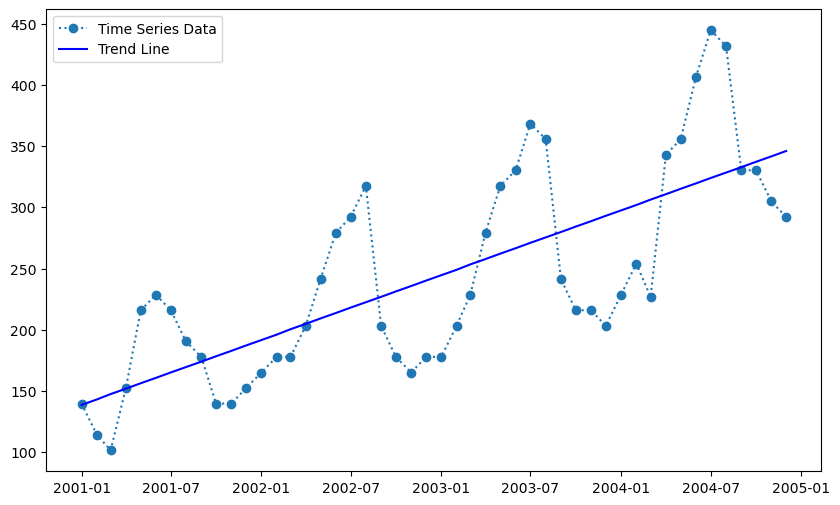

In [544]:
plt.figure(figsize=(10,6))
plt.plot(train['Years'],ytrain,'o:')
plt.plot(train['Years'],yfit,'b')
plt.legend(['Time Series Data','Trend Line'])
plt.show()

In [545]:
xtest = test[['td']].values
ytest = test['Sales'].values

In [546]:
y_forecast = model_trend.predict(xtest)

In [547]:
y_forecast

array([350.36329787, 354.77353452, 359.18377117, 363.59400782,
       368.00424446, 372.41448111, 376.82471776, 381.23495441,
       385.64519106, 390.0554277 , 394.46566435, 398.875901  ,
       403.28613765, 407.69637429, 412.10661094, 416.51684759,
       420.92708424, 425.33732089, 429.74755753, 434.15779418,
       438.56803083, 442.97826748, 447.38850413, 451.79874077])

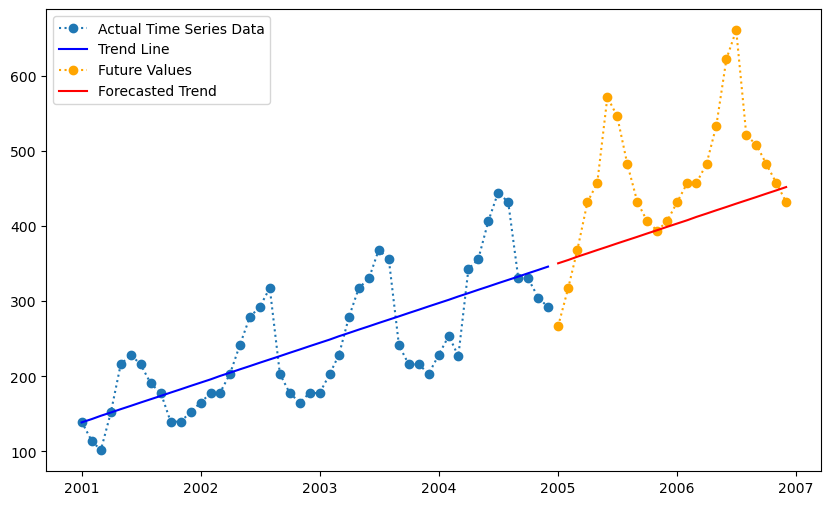

In [548]:
plt.figure(figsize=(10,6))
plt.plot(train['Years'],ytrain,'o:')
plt.plot(train['Years'],yfit,'b')

# forecasted

plt.plot(test['Years'],ytest,'o:',color='orange')
plt.plot(test['Years'],y_forecast,'r')
plt.legend(['Actual Time Series Data','Trend Line','Future Values','Forecasted Trend'])
plt.show()

## Margin of Error 

CI = $\mu +- ME $     (Confidence Interval)

where ME = z * SE

where SE = Standard deviation Error.

z = 1.96 (for 95% Confidence Interval)

In [549]:
error = ytrain - yfit
se = error.std()
ME = 1.96 * se

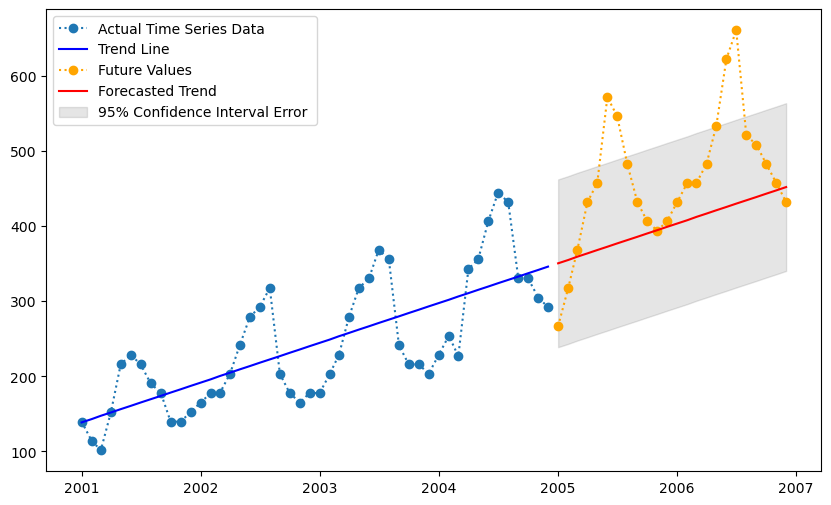

In [550]:
plt.figure(figsize=(10,6))
plt.plot(train['Years'],ytrain,'o:')
plt.plot(train['Years'],yfit,'b')

# forecasted

plt.plot(test['Years'],ytest,'o:',color='orange')
plt.plot(test['Years'],y_forecast,'r')


# Margin of Error.

ci_plus = y_forecast + ME
ci_neg = y_forecast - ME


plt.fill_between(test['Years'],(ci_plus),(ci_neg),alpha=0.1,color='black')
plt.legend(['Actual Time Series Data','Trend Line','Future Values','Forecasted Trend','95% Confidence Interval Error '])
plt.show()

In [551]:
test.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [552]:
# 2006-02-01	457.2	62	February

fc = model_trend.predict(np.array([[62]]))
print('Predicted Sales is',fc)

Predicted Sales is [407.69637429]


In [553]:
print((fc-ME,fc+ME))

(array([296.08717813]), array([519.30557046]))


In [554]:
import warnings
warnings.filterwarnings('ignore')

## additive model

* Linear regression fits the linear line

* Regression Line just captures only the trend of the data.

* It does not capture the seasonal effect in the data.

* For forecasting the data w.r.t time The Margin of Error is usually high.


## Seasonality

* YOY trend sales increases.
* There are certain months where sales are lower & certain months where the sales are higher every year.
* We will observe that there is a clear seasonality for every 12 months

In [555]:
df.head()

,Years,Sales,year,quater
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


In [556]:
data.head()

,Years,Sales,td,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


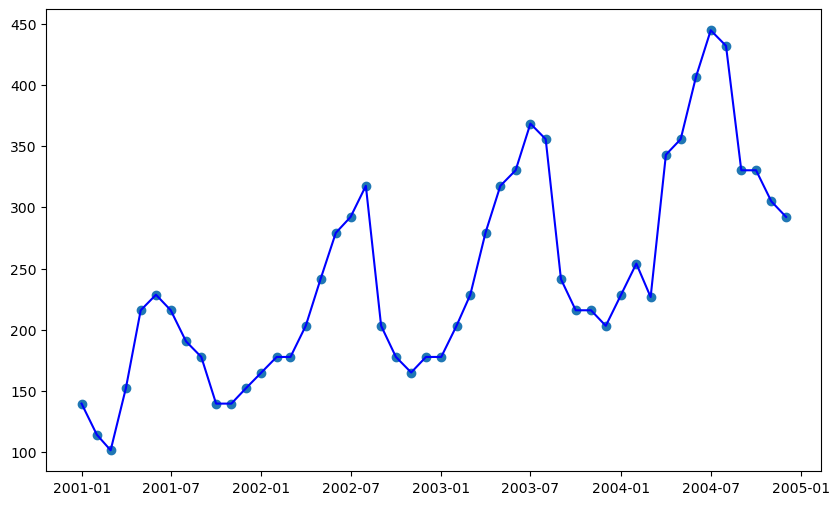

In [557]:
plt.figure(figsize=(10,6))
plt.scatter(train['Years'],train['Sales'])
plt.plot(train['Years'],train['Sales'],'b')
plt.show()

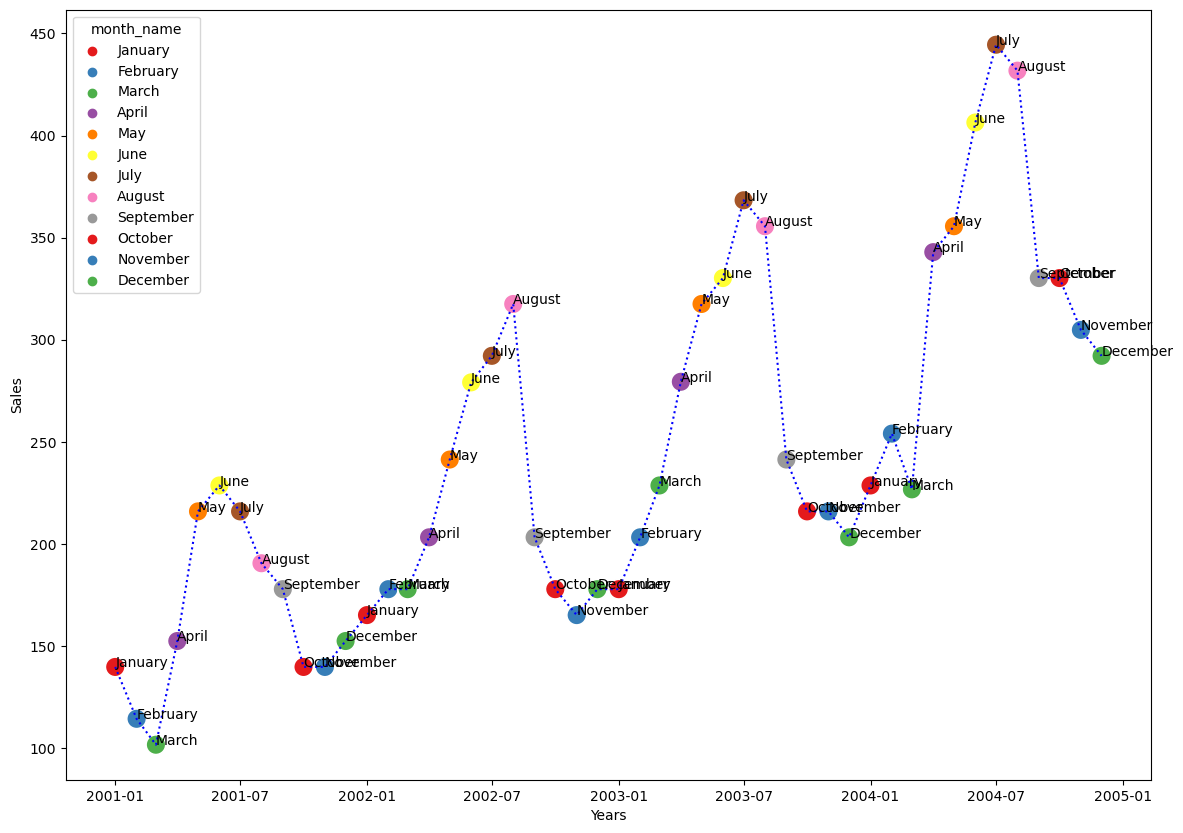

In [558]:
plt.figure(figsize=(14,10))
sns.scatterplot('Years','Sales',data=train,s=200,hue='month_name',palette='Set1')
plt.plot(train['Years'],train['Sales'],'b:')

for i in range(len(train)):
    plt.text(train['Years'][i],train['Sales'][i],train['month_name'][i])
    
plt.show()

In [559]:
test.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [560]:
dummies = pd.get_dummies(train['month_name'],drop_first=True)

In [561]:
dummies.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [562]:
df_train = train.copy()

In [563]:
df_train = pd.concat([df_train,dummies],axis=1)

In [564]:
df_train.head()

,Years,Sales,td,month_name,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,1,0,0,0


In [565]:
dummies = pd.get_dummies(test['month_name'],drop_first=True)
df_test = test.copy()
df_test = pd.concat([df_test,dummies],axis=1)
df_test.head()

,Years,Sales,td,month_name,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,February,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,March,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,April,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,May,0,0,0,0,0,0,0,1,0,0,0


In [566]:
cols = ['td', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September']


x_train_add = df_train[cols].values

In [567]:
x_test_add = df_test[cols].values

In [568]:
y_train_add = df_train['Sales'].values
y_test_add = df_test['Sales'].values

In [569]:
y_train_add

array([139.7, 114.3, 101.6, 152.4, 215.9, 228.6, 215.9, 190.5, 177.8,
       139.7, 139.7, 152.4, 165.1, 177.8, 177.8, 203.2, 241.3, 279.1,
       292.1, 317.5, 203.2, 177.8, 165.1, 177.8, 177.8, 203.2, 228.6,
       279.4, 317.5, 330.2, 368.3, 355.6, 241.3, 215.9, 215.9, 203.2,
       228.6, 254. , 226.7, 342.9, 355.6, 406.4, 444.5, 431.8, 330.2,
       330.2, 304.8, 292.1])

In [570]:
x_train_add.shape,x_test_add.shape,y_train_add.shape,y_test_add.shape

((48, 12), (24, 12), (48,), (24,))

In [571]:
from sklearn.linear_model import LinearRegression

In [572]:
model_add = LinearRegression()

In [573]:
model_add.fit(x_train_add,y_train_add)

LinearRegression()

## fitting the values

In [574]:
y_fit_val_add = model_add.predict(x_train_add)


## forecasting

y_forecast_add = model_add.predict(x_test_add)

## Margin of Error


In [575]:
#ME = 1.96 * SE

error_std = y_train_add - y_fit_val_add

SE = error_std.std()

ME = 1.96 * SE

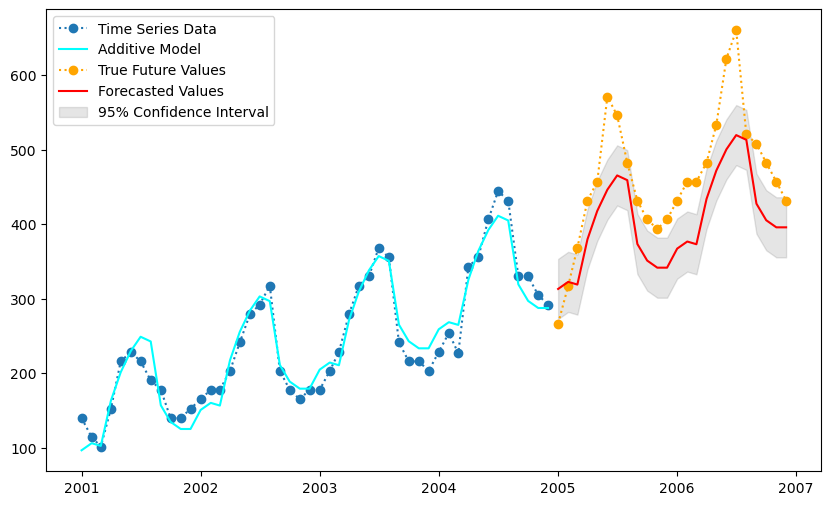

In [576]:
plt.figure(figsize=(10,6))
plt.plot(df_train['Years'],y_train_add,'o:')
plt.plot(df_train['Years'],y_fit_val_add,'cyan')


## Forecasting

plt.plot(df_test['Years'],y_test_add,'o:',color='orange')
plt.plot(df_test['Years'],y_forecast_add,'r')


# margin of Error

ci_plus = y_forecast_add + ME
ci_minus = y_forecast_add - ME


plt.fill_between(test['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')
plt.legend(['Time Series Data','Additive Model','True Future Values','Forecasted Values',
           '95% Confidence Interval'])

plt.show()

## Multiplicative Model

* In Time Series Analysis, A multiplicative model refers for a type of model in which the value of a time series are expressed as the product of several components, each of which has a different interpretition, Specifically a multiplicative model expresses the time series as the product of a trend component, a sesonal component and ir-regular component.


* The trend component represents the long term behaviour of the time series, such as gradual increase or decrease in the value over time.

* The seasonal component captures the repeating patterns that occur within a year or at a fixed time interval such as weekly or monthly pattern.

* The irregular component represents the random or unpredicitible fluctuations in the time series that cannot be explained by any trend / seasonal pattern.


**The Formula can be expressed as**

Y = T x S x I

where T represents the trend
      S represents the Seasonality
      I represents the Irregularity.

1) In additive model we added up the seasonality part.

2) In multiplicative, we will multiply the mean of seasonality to find the trend in the data

In [577]:
data.head()

,Years,Sales,td,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [578]:
data.tail()

,Years,Sales,td,month_name
67,2006-08-01,520.7,68,August
68,2006-09-01,508.0,69,September
69,2006-10-01,482.6,70,October
70,2006-11-01,457.2,71,November
71,2006-12-01,431.8,72,December


In [579]:
test.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


**Step 1 : Linear Regression with time**

In [580]:
df_train1 = train.copy()
df_test2 = test.copy()

In [581]:
df_test2.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [582]:
x_t = df_train1[['td']].values

In [583]:
y_true_mul = df_train1['Sales'].values

In [584]:
y_true_mul

array([139.7, 114.3, 101.6, 152.4, 215.9, 228.6, 215.9, 190.5, 177.8,
       139.7, 139.7, 152.4, 165.1, 177.8, 177.8, 203.2, 241.3, 279.1,
       292.1, 317.5, 203.2, 177.8, 165.1, 177.8, 177.8, 203.2, 228.6,
       279.4, 317.5, 330.2, 368.3, 355.6, 241.3, 215.9, 215.9, 203.2,
       228.6, 254. , 226.7, 342.9, 355.6, 406.4, 444.5, 431.8, 330.2,
       330.2, 304.8, 292.1])

In [585]:
model_trend_mul = LinearRegression()

In [586]:
model_trend_mul.fit(x_t,y_true_mul)

LinearRegression()

In [587]:
y_fitted_value = model_trend_mul.predict(x_t)

In [588]:
y_fitted_value

array([138.67193878, 143.08217542, 147.49241207, 151.90264872,
       156.31288537, 160.72312201, 165.13335866, 169.54359531,
       173.95383196, 178.36406861, 182.77430525, 187.1845419 ,
       191.59477855, 196.0050152 , 200.41525185, 204.82548849,
       209.23572514, 213.64596179, 218.05619844, 222.46643508,
       226.87667173, 231.28690838, 235.69714503, 240.10738168,
       244.51761832, 248.92785497, 253.33809162, 257.74832827,
       262.15856492, 266.56880156, 270.97903821, 275.38927486,
       279.79951151, 284.20974815, 288.6199848 , 293.03022145,
       297.4404581 , 301.85069475, 306.26093139, 310.67116804,
       315.08140469, 319.49164134, 323.90187799, 328.31211463,
       332.72235128, 337.13258793, 341.54282458, 345.95306122])

In [589]:
df_train1['Predicted'] = y_fitted_value

In [590]:
df_train1.head()

,Years,Sales,td,month_name,Predicted
0,2001-01-01,139.7,1,January,138.671939
1,2001-02-01,114.3,2,February,143.082175
2,2001-03-01,101.6,3,March,147.492412
3,2001-04-01,152.4,4,April,151.902649
4,2001-05-01,215.9,5,May,156.312885


SI = $\frac{TSI}{T}$

**Step 3: Caluclate SI**

In [591]:
df_train1['SI'] = df_train1['Sales'] / df_train1['Predicted']

In [592]:
df_train1.head()

,Years,Sales,td,month_name,Predicted,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


**Step 4 : Calculate the Average**

In [593]:
deviation_mean = df_train1[['month_name','SI']].groupby(by='month_name').mean()

In [594]:
deviation_mean = df_train1[['month_name','SI']].groupby(by='month_name').mean().rename(columns={'SI':'Correction Factor'})

In [595]:
deviation_mean

,Correction Factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


In [596]:
df_train1.head()

,Years,Sales,td,month_name,Predicted,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


In [597]:
df_train1 = df_train1.merge(deviation_mean,on='month_name')

In [598]:
df_train1.head()

,Years,Sales,td,month_name,Predicted,SI,Correction Factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934


# Forecasting

In [599]:
df_train1['Fitted_Value'] = df_train1['Predicted'] * df_train1['Correction Factor']

In [600]:
df_train1.head()

,Years,Sales,td,month_name,Predicted,SI,Correction Factor,Fitted_Value
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


In [601]:
len(df_train)

48

In [602]:
df_train1.head()

,Years,Sales,td,month_name,Predicted,SI,Correction Factor,Fitted_Value
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


In [603]:
df_test2.head()

,Years,Sales,td,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [604]:
x_t_test = df_test2[['td']].values
y_true_mul_test = df_test2['Sales'].values

In [605]:
ftrend = model_trend_mul.predict(x_t_test)
df_test2['Forecasted_Trend'] = ftrend

In [606]:
df_test2.head()

,Years,Sales,td,month_name,Forecasted_Trend
48,2005-01-01,266.7,49,January,350.363298
49,2005-02-01,317.5,50,February,354.773535
50,2005-03-01,368.3,51,March,359.183771
51,2005-04-01,431.8,52,April,363.594008
52,2005-05-01,457.2,53,May,368.004244


In [607]:
df_test2 = pd.merge(df_test2,deviation_mean,on='month_name')

In [608]:
df_test2['Forecasted_mul'] = df_test2['Forecasted_Trend'] * df_test2['Correction Factor']

In [609]:
df_test2.head()

,Years,Sales,td,month_name,Forecasted_Trend,Correction Factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,January,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,February,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154


In [610]:
## Margin of Error.

error = df_train1['Sales'] - df_train1['Fitted_Value']
SE = error.std()
ME = 1.96 * SE

In [611]:
df_train1.sort_values(by='Years',inplace=True)

In [612]:
df_test2.sort_values(by='Years',inplace=True)

In [613]:
df_test2.head()

,Years,Sales,td,month_name,Forecasted_Trend,Correction Factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154
6,2005-04-01,431.8,52,April,363.594008,1.045770,380.235769
8,2005-05-01,457.2,53,May,368.004244,1.218536,448.426528


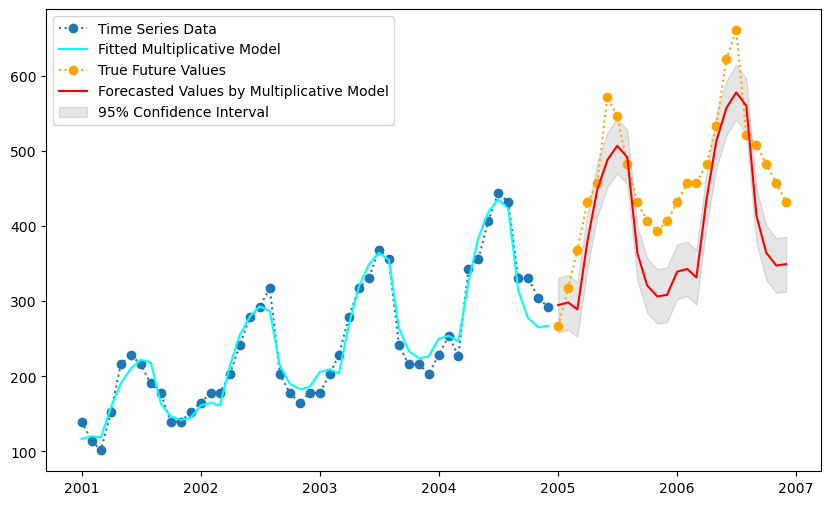

In [614]:
plt.figure(figsize=(10,6))
plt.plot(df_train1['Years'],df_train1['Sales'],'o:')
plt.plot(df_train1['Years'],df_train1['Fitted_Value'],'cyan')


## Forecasting

plt.plot(df_test2['Years'],df_test2['Sales'],'o:',color='orange')
plt.plot(df_test2['Years'],df_test2['Forecasted_mul'],'r')


# margin of Error

ci_plus = df_test2['Forecasted_mul'] + ME
ci_minus = df_test2['Forecasted_mul'] - ME


plt.fill_between(df_test2['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')
plt.legend(['Time Series Data','Fitted Multiplicative Model','True Future Values','Forecasted Values by Multiplicative Model',
           '95% Confidence Interval'])

plt.show()